Compression ratio: 3.00


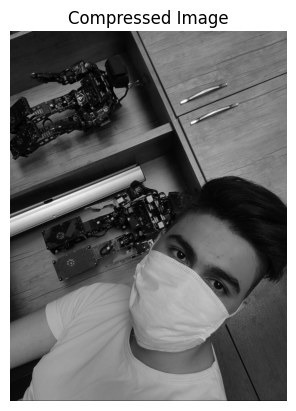

In [8]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

# Return new image with even dimensions
def make_even_dimensions(image):
    height, width = image.shape
    
    new_height = height + (height % 2)
    new_width = width + (width % 2)

    new_image = np.zeros((new_height, new_width))
    new_image[:height, :width] = image
    
    return new_image

def compress_image(input_path, output_path, quality=50):

    # Load image
    image = cv2.imread(input_path, cv2.IMREAD_GRAYSCALE)

    # Make dimensions even
    even_image = make_even_dimensions(image)

    # Apply DCT
    dct_image = cv2.dct(np.float32(even_image))
    
    # Quantize
    quantized_image = np.round(dct_image / (quality * 0.01))

    # Inverse DCT 
    compressed_image = cv2.idct(quantized_image)

    # Save compressed image
    cv2.imwrite(output_path, compressed_image)

    return compressed_image

# Rest of code remains same

input_image_path = 'test.jpg'
output_image_path = 'compressed.jpg' 
compression_quality = 50

# Compress image
compressed_img = compress_image(input_image_path, output_image_path, compression_quality)

# Calculate and display compression ratio
original_size = cv2.imread(input_image_path).size
compressed_size = compressed_img.size
ratio = original_size / compressed_size

print(f"Compression ratio: {ratio:.2f}")

# Display compressed image
plt.imshow(compressed_img, cmap='gray')
plt.title("Compressed Image")
plt.axis('off')
plt.show()